# Notebook 4: Análise de Score e Produção por Ano
## ETL e Visualização com Gráfico de Duas Séries

### Carregamento dos Datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

INPUT_DATA_PATH = './datas/'
OUTPUT_PATH = './outputs/'

In [2]:
df_animes = pd.read_csv(os.path.join(INPUT_DATA_PATH, 'animes.csv'))

print(f"Animes: {df_animes.shape}")
df_animes[['title', 'year', 'score']].head()

Animes: (20237, 13)


,title,year,score
0,Howl's Moving Castle,2004.0,8.41
1,Death Note,2006.0,8.63
2,Problem Children Are Coming from Another World...,2013.0,7.42
3,BTOOOM!,2012.0,7.34
4,Sword Art Online,2012.0,7.50


### Transformação: Limpeza de Dados

In [6]:
df_clean = df_animes[(df_animes['year'].notna()) & (df_animes['score'].notna())].copy()

# Filtrar anos válidos (1970-2024)
df_clean = df_clean[(df_clean['year'] >= 1970) & (df_clean['year'] <= 2024)]

# Filtrar scores válidos (1-10)
df_clean = df_clean[(df_clean['score'] >= 1) & (df_clean['score'] <= 10)]

print(f"Dados após limpeza: {df_clean.shape}")
print(f"Anos: {df_clean['year'].min()} - {df_clean['year'].max()}")
print(f"Scores: {df_clean['score'].min()} - {df_clean['score'].max()}")

Dados após limpeza: (18877, 13)
Anos: 1970.0 - 2024.0
Scores: 1.73 - 9.19


### Análise 4: Score Médio e Quantidade de Animes por Ano (Group By)

In [4]:
# Agrupamento por ano - duas métricas
stats_por_ano = df_clean.groupby('year').agg({
    'score': 'mean',
    'animeID': 'count'
}).reset_index()

stats_por_ano.columns = ['year', 'score_medio', 'quantidade']

print(stats_por_ano.head(10))
print(f"\nTotal de anos: {len(stats_por_ano)}")

     year  score_medio  quantidade
0  1970.0     5.479024          41
1  1971.0     5.234571          35
2  1972.0     5.384688          32
3  1973.0     5.859615          26
4  1974.0     5.665789          38
5  1975.0     5.583415          41
6  1976.0     5.588478          46
7  1977.0     5.843810          42
8  1978.0     6.098163          49
9  1979.0     5.895231          65

Total de anos: 55


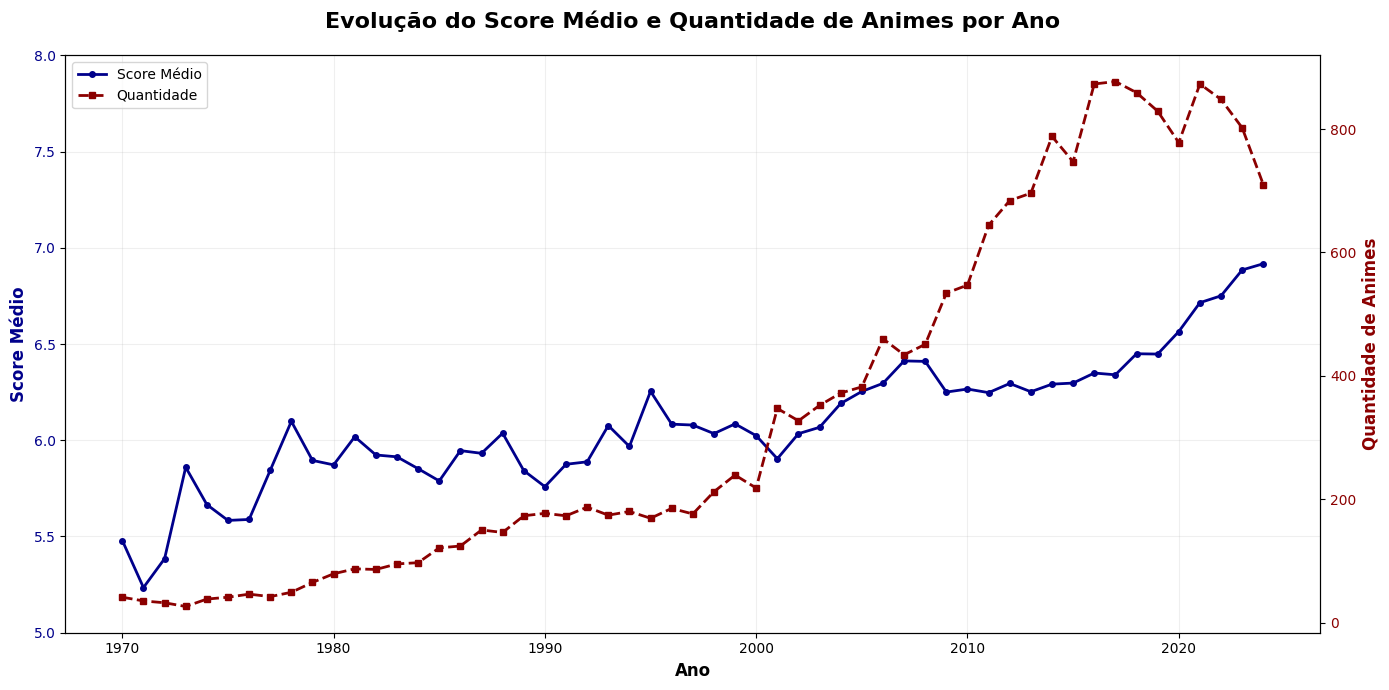

In [5]:
# Visualização com duas séries em Y (eixos diferentes)
fig, ax1 = plt.subplots(figsize=(14, 7))

# Primeira série: Score médio (eixo Y esquerdo)
color1 = 'darkblue'
ax1.set_xlabel('Ano', fontsize=12, fontweight='bold')
ax1.set_ylabel('Score Médio', color=color1, fontsize=12, fontweight='bold')
line1 = ax1.plot(stats_por_ano['year'], stats_por_ano['score_medio'], 
                 color=color1, marker='o', linewidth=2, markersize=4, label='Score Médio')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim(5, 8)
ax1.grid(True, alpha=0.2)

# Segunda série: Quantidade (eixo Y direito)
ax2 = ax1.twinx()
color2 = 'darkred'
ax2.set_ylabel('Quantidade de Animes', color=color2, fontsize=12, fontweight='bold')
line2 = ax2.plot(stats_por_ano['year'], stats_por_ano['quantidade'], 
                 color=color2, marker='s', linewidth=2, markersize=4, 
                 linestyle='--', label='Quantidade')
ax2.tick_params(axis='y', labelcolor=color2)

# Título e legenda
plt.title('Evolução do Score Médio e Quantidade de Animes por Ano', 
          fontsize=16, fontweight='bold', pad=20)

# Combinar legendas
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', fontsize=10)

fig.tight_layout()
plt.savefig(os.path.join(OUTPUT_PATH, 'nb4_score_quantidade_dual.png'), dpi=300, bbox_inches='tight')
plt.show()

#### Explicação do Gráfico

Esse gráfico conta uma história fascinante sobre a evolução da indústria de anime! Com **duas linhas trabalhando juntas**, conseguimos ver tanto a quantidade quanto a qualidade ao longo do tempo.

**A linha azul (Score Médio)** mostra que a qualidade se mantém relativamente estável, oscilando entre 6 e 7.5. É interessante ver que os anos mais antigos têm scores ligeiramente mais altos - talvez porque só os melhores animes daquela época ainda são lembrados e avaliados hoje.

**A linha vermelha (Quantidade)** é onde a mágica acontece! Olha só essa explosão de produções a partir dos anos 2000! A indústria literalmente explodiu em tamanho, produzindo cada vez mais títulos a cada ano. É o reflexo da globalização do anime e do boom da indústria.

Agora vem a parte mais interessante: **será que quantidade prejudicou a qualidade?** Olhando o gráfico, podemos dizer que não muito! Apesar do volume de produções ter aumentado absurdamente, o score médio não despencou. Ele se manteve relativamente estável.

Isso provavelmente acontece porque com mais produções vem mais diversidade - tem anime pra todos os gostos, desde obras-primas aclamadas até produções mais nichadas que agradam públicos específicos.

O que esse gráfico realmente nos diz é: **a indústria de anime amadureceu**. Ela conseguiu crescer, se expandir globalmente e aumentar a produção sem perder completamente o controle de qualidade.